In [14]:
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [15]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

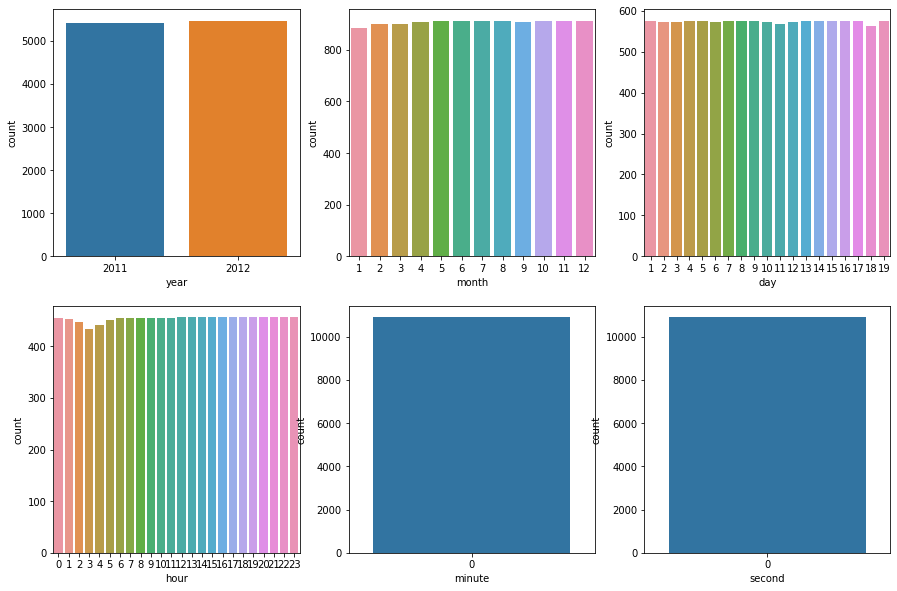

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프의 크기 설정
plt.figure(figsize=(15,10))

# year 컬럼 시각화
plt.subplot(2,3,1)
sns.countplot(data=train, x='year')

# month 컬럼 시각화
plt.subplot(2,3,2)
sns.countplot(data=train, x='month')

# day 컬럼 시각화
plt.subplot(2,3,3)
sns.countplot(data=train, x='day')

# hour 컬럼 시각화
plt.subplot(2,3,4)
sns.countplot(data=train, x='hour')

# minute 컬럼 시각화
plt.subplot(2,3,5)
sns.countplot(data=train, x='minute')

# second 컬럼 시각화
plt.subplot(2,3,6)
sns.countplot(data=train, x='second')

# 그래프 표시
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

# 사용할 feature 컬럼 선택 (예시: 'year', 'month', 'day', 'hour' 선택)
selected_features = ['year', 'month', 'day', 'hour']  # 실제로는 다양한 feature 조합을 시도해 볼 수 있습니다.

# X, y 데이터 정의
X = train[selected_features]
y = train['count']

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
print(X_train.head())
print(y_train.head())

      year  month  day  hour
2815  2011      7    6     5
8695  2012      8    4    16
8406  2012      7   11    15
1543  2011      4   10     4
4952  2011     11   19    10
2815     35
8695    450
8406    276
1543      5
4952    200
Name: count, dtype: int64


In [18]:
from sklearn.linear_model import LinearRegression

# LinearRegression 모델 객체 생성
lr_model = LinearRegression()

# 모델 학습
lr_model.fit(X_train, y_train)

# 학습된 모델의 계수(coefficient) 및 절편(intercept) 확인
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)


Coefficients: [94.79516525  9.02253791  0.44658829 10.58902954]
Intercept: -190674.64447917923


In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 학습된 모델로 X_test에 대한 예측값 출력
y_pred = lr_model.predict(X_test)

# 예측값과 정답간의 MSE 계산
mse = mean_squared_error(y_test, y_pred)

# RMSE 계산
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 24495.53884350196
Root Mean Squared Error: 156.51050713451144


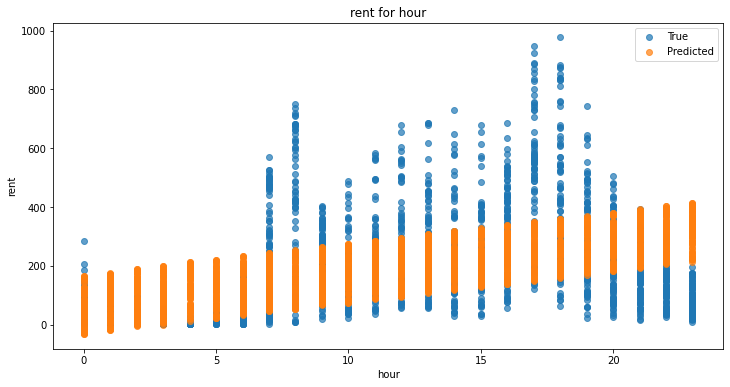

In [20]:
import matplotlib.pyplot as plt

# hour와 count의 관계 시각화
plt.figure(figsize=(12, 6))

plt.scatter(X_test['hour'], y_test, label='True', alpha=0.7)
plt.scatter(X_test['hour'], y_pred, label='Predicted', alpha=0.7)
plt.title('rent for hour')
plt.xlabel('hour')
plt.ylabel('rent')
plt.legend()

plt.show()
